# Import and function declaration

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import cv2


In [57]:
def sift_detector(image1: np.array, image2: np.array, nfeatures: int = 0):
    sift = cv2.SIFT_create(nfeatures=nfeatures)

    kp1, des1 = sift.detectAndCompute(image1, None)
    kp2, des2 = sift.detectAndCompute(image2, None)

    return kp1, des1, kp2, des2

In [70]:
def shift_matcher(des1, des2):
    matches = []
    for i, k1 in enumerate(des1):
        for j, k2 in enumerate(des2):
            matches.append(cv2.DMatch(_distance=np.linalg.norm((k1 - k2), ord=1), _imgIdx=0, _queryIdx=i,_trainIdx=j))
        
    matches = sorted(matches, key = lambda x : x.distance)
    return matches

In [27]:
def pca_sift_matcher(des1, des2):
    
    mean1 = np.mean(des1, axis=0)
    mean2 = np.mean(des2, axis=0)
    des1 -= mean1
    des2 -= mean2
    pca = cv2.PCACompute(des1, mean=None, maxComponents=128)[1]
    des1 = np.dot(des1, pca.T)
    des2 = np.dot(des2, pca.T)

    matches = []
    for i, k1 in enumerate(des1):
        for j, k2 in enumerate(des2):
            matches.append(cv2.DMatch(_distance=np.linalg.norm((k1 - k2), ord=1), _imgIdx=0, _queryIdx=i,_trainIdx=j))
            
    matches = sorted(matches, key = lambda x : x.distance)

    return matches

In [61]:
def draw_matches_img(img1, kp1, img2, kp2, matches, n_matches:int = 5, open_window: bool = False):
    
    matches = sorted(matches, key = lambda x : x.distance)
    
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:n_matches], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
    plt.imshow(img_matches) 
    plt.axis('off')

    if open_window:
        cv2.imshow('Matches', img_matches)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

# Load media

In [62]:
img1 = cv2.imread('media/bee.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('media/bee_part.jpg', cv2.IMREAD_GRAYSCALE)

# Tests

# OpenCV Brute-force

In [71]:
kp1, des1, kp2, des2 = sift_detector(img1, img2)

In [72]:
matches = shift_matcher(des1, des2)

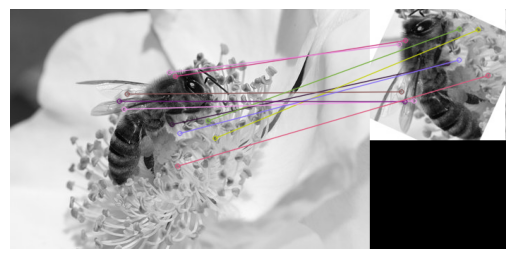

In [74]:
draw_matches_img(img1, kp1, img2, kp2, matches, 10, False)

# Self PCA-shift 

In [66]:
kp1, des1, kp2, des2 = sift_detector(img1, img2, 4096)

In [67]:
matches = pca_sift_matcher(des1, des2)

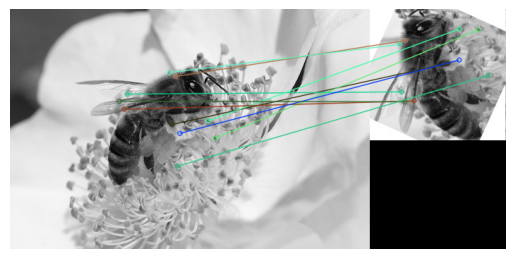

In [75]:
draw_matches_img(img1, kp1, img2, kp2, matches, 10, False)